# Classification

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0.

In [5]:
import common as cm
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce 

# Part 1: Naive Bayes for binary data

1.1 ) Given are the following objects (data) characterized with 4 binary attributes:

In [6]:
data = np.array([
[1, 0, 1, 1],#1
[0, 1, 0, 0],#0
[0, 1, 1, 1],#1
[1, 0, 1, 0],#0
[1, 0, 0, 1],#0
[0, 0, 1, 1],#1
[1, 1, 1, 1],#1
[1, 0, 0, 1],#0
[0, 1, 0, 1],#1
[0, 0, 0, 1],#0
])

1.2) Each object is assigned to a class "0" or "1". The assignements are as follows (cl):

In [7]:
cl = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

1.3) When do you think an object is is assigned to class "1"?

1.4) Build a naive Basyes classifier. For this reason, complete the following function. This function should return a vector [p0, p1], where p0 and p1 are propabilities that an input object (obj) belongs to, respectively, class "0" and "1". In case if any $P(x = 0\text{ or }1|CL = 0\text{ or }1) = 0$, replace it with $0.01$.

In [8]:
def getNaiveBayesProbabilities(obj, data, cl):
    p = [0.0, 0.0]
    # TODO
    total_data_length = len(data)
    pc_0 = sum(cl==0)/total_data_length
    pc_1 = sum(cl==1)/total_data_length
    #print(data[cl==0][:,0])
    probs = [[ sum(data[cl==clas][:,column])/len(data[cl==clas][:,column]) for column in range(len(data[0]))]for clas in [0,1]]
    #print(probs)
    p = [pc_0,pc_1]
    for i in range(2):
        for j in range(len(obj)):
            if obj[j]==1:
                mul=probs[i][j]
            else:
                mul=1-probs[i][j]
            if mul==0:
                mul=1
            p[i]*=mul
                
    return p

1.6) Find objects which give the maximum probability for class "0" and "1". 

In [9]:
# TODO
maxP0=0
best_data_p0=[]
maxP1=0
best_data_p1=[]
for i in range(16):
    conv = [int(x) for x in bin(i)[2:]]
    arr=[0]*(4-len(conv))
    arr.extend(conv)
    curPs =getNaiveBayesProbabilities(arr, data, cl)
    if(curPs[0]>maxP0):
        maxP0=curPs[0]
        best_data_p0=arr.copy()
    if(curPs[1]>maxP1):
        maxP1=curPs[1]
        best_data_p1=arr.copy()

print("best p0")
print(maxP0)
print(best_data_p0)
print("best p1")
print(maxP1)
print(best_data_p1)

print(getNaiveBayesProbabilities([0,0,0,0], data, cl))
print(getNaiveBayesProbabilities([1,1,1,1], data, cl))

best p0
0.1152
[1, 0, 0, 1]
best p1
0.144
[0, 1, 1, 0]
[0.051200000000000016, 0.023999999999999994]
[0.0072, 0.096]


## Part 2: k-NN algorithm

2.1) In common.py, there is defined a Euclidean distance function (cm.getEuclideanDistance(A, B)): 

In [100]:
#TEST
print(cm.getEuclideanDistance([0.0, 0.0], [0.0, 1.0]))
print(cm.getEuclideanDistance([0.0, 0.0], [1.0, 1.0]))

1.0
1.4142135623730951


2.2) Get test data set & display:<br>
- data = matrix n x m, n = the number of objects, m = the number of attributes<br>
- classified objects: [[list of objects (indices) being assigned to the fist class],[... to the second class],...,[... to the last class]]; note that the classes do not impose any preference order
- list of objects (indices) being not classified

IMPORTANT: plot $\rightarrow$ black squares represent non classified objects

[[1, 2, 3, 5, 6, 7, 9, 12, 13, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 43, 44, 46, 47, 48, 49], [51, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 66, 68, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 88, 90, 95, 98, 99], [100, 101, 102, 103, 104, 105, 106, 110, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 124, 125, 127, 128, 129, 130, 133, 134, 135, 136, 137, 139, 143, 145, 148, 149], [150, 151, 153, 154, 155, 156, 158, 159, 160, 161, 163, 167, 168, 169, 170, 171, 174, 175, 177, 178, 179, 180, 182, 184, 185, 186, 187, 189, 191, 192, 193, 197, 198, 199]]


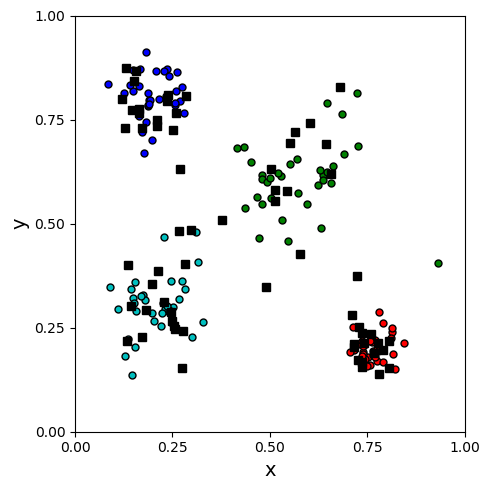

In [101]:
DATA = np.array(cm.getTestDataSet())
CLASSIFIED = cm.getTestClassified()
print(CLASSIFIED)
NOT_CLASSIFIED = cm.getTestNotClassified()
cm.displayDataSet(plt, DATA, CLASSIFIED, NOT_CLASSIFIED) #plt = plot package; see the imports above

### CLASS 1 = BLUE
### CLASS 2 = GREEN
### CLASS 3 = RED
### CLASS 4 = CYAN


2.3) k-NN implementation: Complete the below function. Use the "non-weighted" variant of k-NN.  

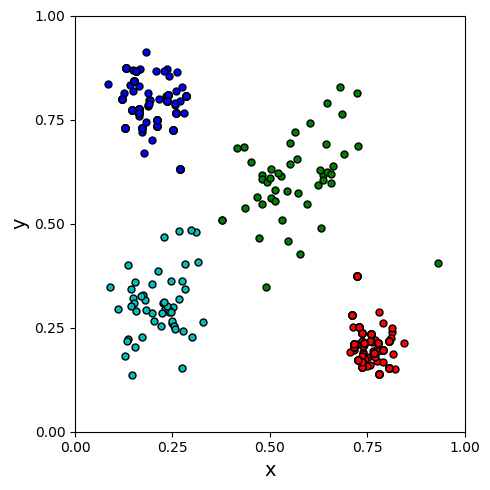

In [123]:



def doKNN(K, DATA, CLASSIFIED, NOT_CLASSIFIED):
    ### COPY INPUT CLASSIFIED OBJECTS 
    ### WHEN CLASSIFYING "NOT_CLASSIFIED" OBJECTS, UPDATE CL 
    CL = CLASSIFIED.copy()
    #print(CL.flatten())
    ### For each index in NOT_CLASSIFIED, store here its corresponding (computed) class (in this exercise = 0, 1, or 2)
    UPDATE = [[] for i in range(len(CL))]
    for IDX in NOT_CLASSIFIED:
        def sorten(ide):
            return cm.getEuclideanDistance(DATA[ide], DATA[IDX])
            
        n_ids=sorted(reduce(lambda x,y :x+y ,CL),key=sorten)[:K]
        classesCount=[sum([1 if ide in CL[i] else 0 for ide in n_ids])for i in range(len(CL))]
        max_cl_count = max(classesCount)
        for i in range(len(classesCount)):
            if classesCount[i]==max_cl_count:
                UPDATE[i].append(IDX)
                break;
        
    
    ################
    for i in range(len(UPDATE)):
        CL[i]= CL[i]+UPDATE[i]
    return CL
        
NEW_CLASSIFIED = doKNN(2, DATA, CLASSIFIED, NOT_CLASSIFIED)
cm.displayDataSet(plt, DATA, NEW_CLASSIFIED)

# Part 3 - performance evaluation

3.1) You are asked to evaluate the performance of k-NN (weighted variant) for different K. Firstly, run the below piece of code and analyze the data. Which class do you think is the most difficult/easiest to describe/characterize?

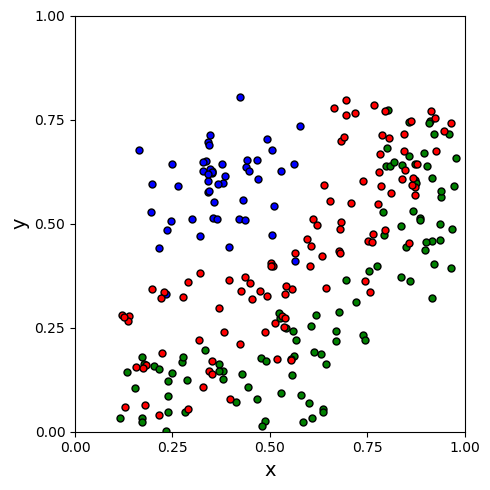

In [124]:
DATA_2 = cm.getTest2DataSet()
CLASSIFIED_2 = cm.getTest2Classified()
cm.displayDataSet(plt, DATA_2, CLASSIFIED_2)

### CLASS 1 = BLUE
### CLASS 2 = GREEN
### CLASS 3 = RED

3.2) To evaluate the performance of k-NN, you can check how well it predicts classes for new (not known previously) objects. For this reason, assume that you "do not know" the true class assignments for some random subset of objects from the data set. Firstly, you can generate some permutation of indices from 0 to 249 (one per object):

In [127]:
idxs = [i for i in range(250)]
np.random.shuffle(idxs)

Then, the below piece of code constructs temporary variables CLASSIFIED_TRAIN and NOT_CLASSIFIED_TEST. CLASSIFIED_TRAIN contains information on assignements for the first 50% random objects determined by "idxs", while NOT_CLASSIFIED_TEST contains the remianing "not classified" object indices. Run the code below and observe that 50% of some uniformly distributed data points are not classified. 

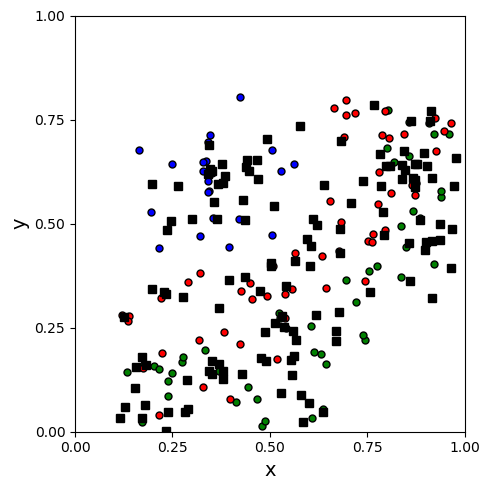

In [129]:
CLASSIFIED_TRAIN = [[], [], []]
NOT_CLASSIFIED_TEST = []
LIM = int(len(DATA_2) * 0.5)
for i in range(LIM):
    if idxs[i] < 50: CLASSIFIED_TRAIN[0].append(idxs[i])
    elif idxs[i] < 150: CLASSIFIED_TRAIN[1].append(idxs[i])
    else: CLASSIFIED_TRAIN[2].append(idxs[i])
for i in range(LIM, 250):
    NOT_CLASSIFIED_TEST.append(idxs[i])
cm.displayDataSet(plt, DATA_2, CLASSIFIED_TRAIN, NOT_CLASSIFIED_TEST)

3.3) Evaluate the performance of the weighted variant of k-NN for K = 1,3,5,7 and CLASSIFIED_TRAIN, NOT_CLASSIFIED_TEST data sets. For each K:<br>
- for each class, compute how many times an object has been correctly/incorrectly classified. E.g., if 10 objects are associated with the first class "BLUE" but k-NN classified correctly only 4 of them, the result is 4 (or 6 in case of incorrect assignments stat);<br>
- for each class, compute recall (number of correct assignments / total number of expected assignments, e.g., if 10 objects are associated with the first class "BLUE"  but k-NN classified correctly only 4 of them, recall for the first class is 40%);<br>  

Which class got the best/the worst recall. Why?
What is the best K. Are there any significant differences?
You can use cm.displayCompareDataSet(plt, DATA_2, CLASSIFIED_2, CL) to check (display) which solutions were classified incorrectly. These are marked with squares. The background of these squares is appropriately selected according to the true (expected) assignment. 

In [175]:
def doKNN(K, DATA, CLASSIFIED, NOT_CLASSIFIED):
    ### COPY INPUT CLASSIFIED OBJECTS 
    ### WHEN CLASSIFYING "NOT_CLASSIFIED" OBJECTS, UPDATE CL 
    CL = CLASSIFIED.copy()
    #print(CL.flatten())
    ### For each index in NOT_CLASSIFIED, store here its corresponding (computed) class (in this exercise = 0, 1, or 2)
    UPDATE = [[] for i in range(len(CL))]
    for IDX in NOT_CLASSIFIED:
        def sorten(ide):
            return cm.getEuclideanDistance(DATA[ide], DATA[IDX])
            
        n_ids=sorted(reduce(lambda x,y :x+y ,CL),key=sorten)[:K]
        classes_distances = [[] for i in range(len(CL))]
        for i in range(len(n_ids)):
            for j in range(len(CL)):
                if n_ids[i] in CL[j]:
                    classes_distances[j].append(sorten(n_ids[i]))
        #print(np.array(classes_distances))
        classes_average_distances= [sum(lst)/len(lst) if len(lst) else float("inf") for lst in classes_distances]
        #print(classes_average_distances)
        
        min_average = min(classes_average_distances)
        for i in range(len(classes_average_distances)):
            if classes_average_distances[i]==min_average:
                UPDATE[i].append(IDX)
                break;
        
    
    ################
    for i in range(len(UPDATE)):
        CL[i]= CL[i]+UPDATE[i]
    return CL

1
[48, 91, 81]
[2, 9, 19]
[96.0, 91.0, 81.0]


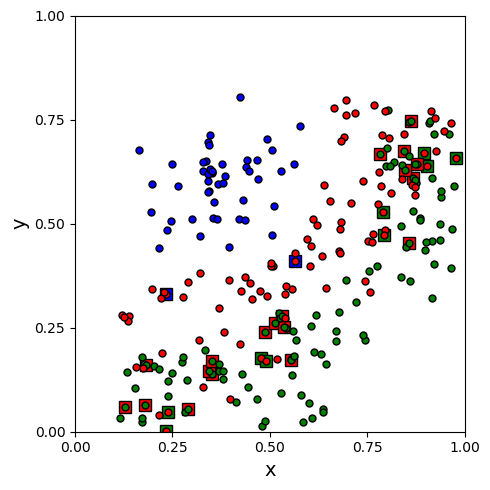

3
[48, 86, 81]
[2, 14, 19]
[96.0, 86.0, 81.0]


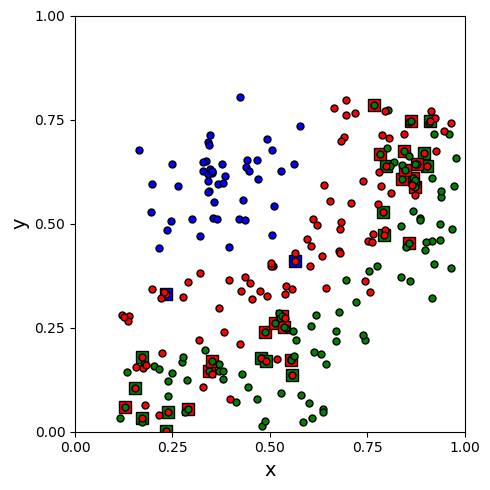

5
[48, 84, 83]
[2, 16, 17]
[96.0, 84.0, 83.0]


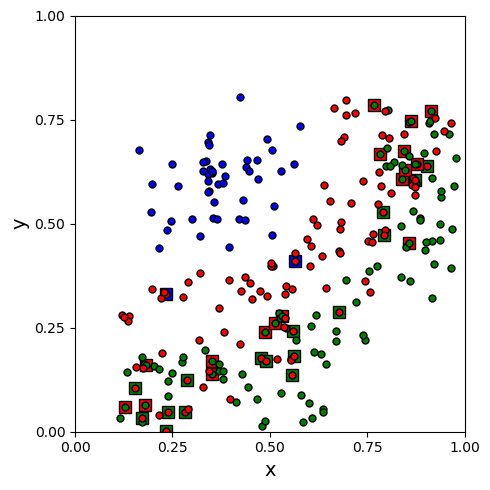

7
[48, 79, 84]
[2, 21, 16]
[96.0, 79.0, 84.0]


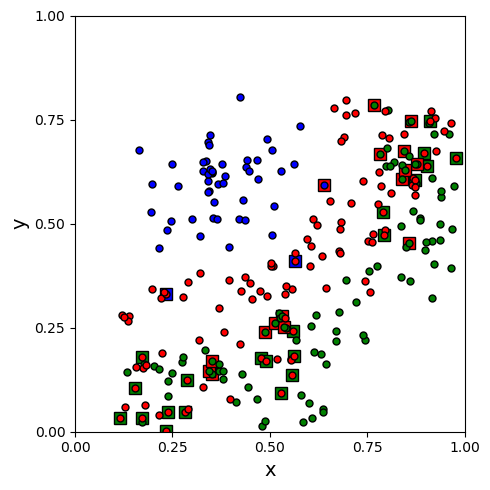

9
[48, 82, 82]
[2, 18, 18]
[96.0, 82.0, 82.0]


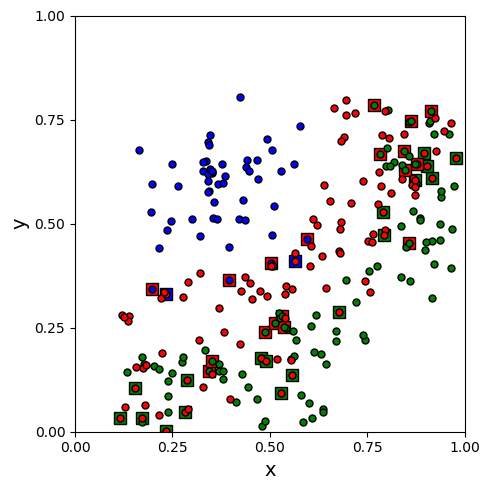

11
[48, 85, 81]
[2, 15, 19]
[96.0, 85.0, 81.0]


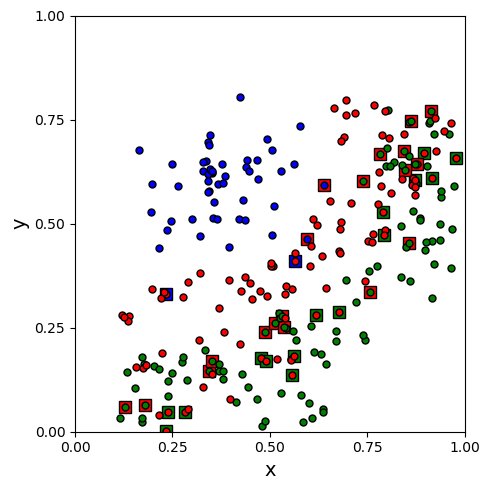

13
[49, 79, 79]
[1, 21, 21]
[98.0, 79.0, 79.0]


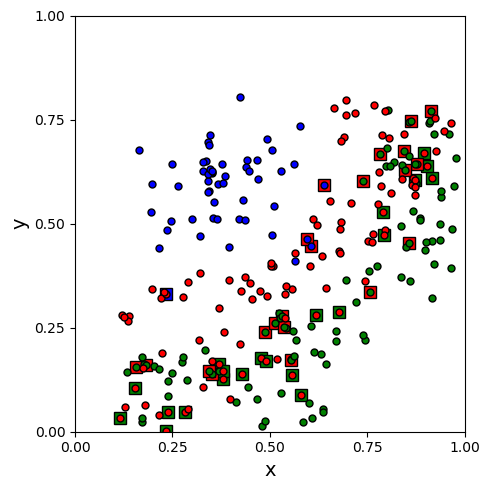

15
[49, 89, 81]
[1, 11, 19]
[98.0, 89.0, 81.0]


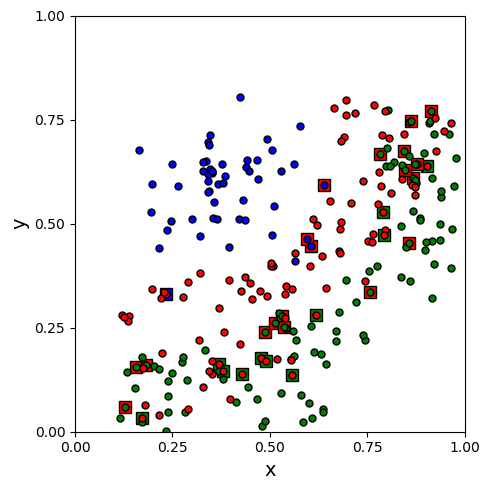

In [177]:
### CLASS 1 = BLUE
### CLASS 2 = GREEN
### CLASS 3 = RED

for K in [1,3,5,7,9,11,13,15]:
    CL = doKNN(K, DATA_2, CLASSIFIED_TRAIN, NOT_CLASSIFIED_TEST)
    print(K)
    CORRECTLY = [0,0,0]
    INCORRECTLY = [0,0,0]
    RECALL = [0,0,0]
    #TODO
    for i in range(len(CLASSIFIED_2)):
        for j in range(len(CLASSIFIED_2[i])):
            if CLASSIFIED_2[i][j] in CL[i]:
                CORRECTLY[i]+=1
            else:
                INCORRECTLY[i]+=1
    for i in range(len(RECALL)):
        RECALL[i]=CORRECTLY[i]/(INCORRECTLY[i]+CORRECTLY[i])*100
    ### PRINT STATS
    print(CORRECTLY)
    print(INCORRECTLY)
    print(RECALL)
    ### DISPLAY
    cm.displayCompareDataSet(plt, DATA_2, CLASSIFIED_2, CL)      